<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Bechdel Test</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/bechdel-test/">https://discovery.cs.illinois.edu/microproject/bechdel-test/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: Bechdel Test

The Bechdel Test, or Bechdel-Wallace Test, is a simple way of measuring the representation of women in a film or other work of fiction.  To pass the The Bechdel Test, a work must pass all three criteria:

1. The work must have at least two women in it,

2. who talk to each other,

3. about something other than a man.

The test was popularized by Alison Bechdel's comic, in a 1985 strip called "The Rule".  The website [BechdelTest.com](BechdelTest.com) provides a searchable database of films and their Bechdel Test results, allowing users to explore and analyze patterns in gender representation in cinema.


### Importing the Bechdel Test Dataset

The [BechdelTest.com](BechdelTest.com) public API provides a easy-to-access data source that contains the Bechdel Test scores for thousands of movies.  Through reading the technical API documentation at [https://bechdeltest.com/api/v1/doc](https://bechdeltest.com/api/v1/doc), you can find that:

- The Bechdel Test API uses the JSON format, which can be read into a DataFrame using `pd.read_json(...)`,

- The URL endpoint for the list of all movies is `https://bechdeltest.com/api/v1/getAllMovies`.

Using `pd.read_json`, create a DataFrame `df_bechdel` to store all the movies and their Bechdel Test scores:

In [1]:
import pandas as pd
df_bechdel = pd.read_json("https://bechdeltest.com/api/v1/getAllMovies")
df_bechdel

,id,year,rating,imdbid,title
0,9602,1874,0,3155794,Passage de Venus
1,9804,1877,0,14495706,La Rosace Magique
2,9603,1878,0,2221420,Sallie Gardner at a Gallop
3,9806,1878,0,12592084,Le singe musicien
4,9816,1881,0,7816420,Athlete Swinging a Pick
...,...,...,...,...,...
9901,10751,2023,3,14966324,Reflect
9902,10756,2023,3,10954600,Ant-Man and the Wasp: Quantumania
9903,10728,2023,3,12844910,Pathaan
9904,10754,2023,3,10855768,Missing


<hr style="color: #DD3403;">

## Part 1: Creating a Pivot Table for Analysis

With over 9,000 movies that were released over 100 years, creating a summary of our data may be helpful for analysis!

When summarizing data, `groupby` is commonly used to aggregate all data that has an identical value in one or more columns.  For example, to count how many movies have a Bechdel Test score in our dataset each year, we could use:

```
df_bechdel.groupby("year").agg("count")
```

Try that below:

In [2]:
df_bechdel.groupby("year").agg("count")

,id,rating,imdbid,title
year,,,,
1874,1,1,1,1
1877,1,1,1,1
1878,2,2,2,2
1881,1,1,1,1
1883,1,1,1,1
...,...,...,...,...
2019,265,265,265,265
2020,156,156,156,156
2021,170,170,170,170


## Step 1.1: Specify the `index`:

When we want to summarize data by **two or more** categories, the `pivot_table` function of a DataFrame can be useful.  The `pivot_table` function requires us to specify:

- The `index` requires us to specify the data we want the values of our **rows** to be.  For example, if we want our rows to be each year in our dataset we would specify `index="year"`.


Try creating a pivot table where we only specify the `index` value by trying the following different lines:

1. First try creating a DataFrame where each row is a "rating": `df_bechdel.pivot_table(index="rating")`

2. Next try creating a DataFrame where each row is a "year": `df_bechdel.pivot_table(index="year")`

In [3]:
df_bechdel.pivot_table(index="rating")
df_bechdel.pivot_table(index="year")

C:\Users\Advay\AppData\Local\Temp\ipykernel_20928\1127136884.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_bechdel.pivot_table(index="rating")
C:\Users\Advay\AppData\Local\Temp\ipykernel_20928\1127136884.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_bechdel.pivot_table(index="year")


,id,rating
year,,
1874,9602.000000,0.000000
1877,9804.000000,0.000000
1878,9704.500000,0.000000
1881,9816.000000,0.000000
1883,9831.000000,0.000000
...,...,...
2019,9172.437736,2.377358
2020,9568.147436,2.480769
2021,10114.588235,2.352941


## Step 1.2: Specify the `aggfunc`:

The second value we will specify is the `aggfunc`.  This is identical to the `agg` function in `groupby` and tells Python how to aggregate multiple values together.  By default (the results you saw in "Step 1") is that Python will take the `"mean"`.

However, since each row of data is one movie, it makes the most sense to `"count"` each row of data.  Using your code above, add a second parameter to `df_bechdel.pivot_table` to include `aggfunc="count"`:

In [8]:
df_bechdel.pivot_table(index="rating", aggfunc = 'count')

,id,imdbid,title,year
rating,,,,
0,1092,1092,1092,1092
1,2143,2143,2143,2143
2,1014,1014,1014,1014
3,5657,5657,5657,5657


## Step 1.3: Specify the `columns`:

The third value we will specify is `columns`.  This specifies what column from the original DataFrame should be presented in each column.  This `columns` value is combined together with the rows value (`index`) we specified in Part 1.

To complete this step, create a pivot table where:

- Each row (`index` parameter) in our pivot table is one year from the original DataFrame,
- Each column (`columns` parameter) in our pivot table is one rating from the original DataFrame, **and**
- The values are aggregated together by the `"count"` function (`aggfunc` parameter)

Call this pivot table `df` and we'll check to make sure it looks good:

In [9]:
df = df_bechdel.pivot_table(index="year", aggfunc = 'count', columns="rating")
df

id                    imdbid                    title              \
rating     0     1     2      3      0     1     2      3     0     1     2   
year                                                                          
1874     1.0   NaN   NaN    NaN    1.0   NaN   NaN    NaN   1.0   NaN   NaN   
1877     1.0   NaN   NaN    NaN    1.0   NaN   NaN    NaN   1.0   NaN   NaN   
1878     2.0   NaN   NaN    NaN    2.0   NaN   NaN    NaN   2.0   NaN   NaN   
1881     1.0   NaN   NaN    NaN    1.0   NaN   NaN    NaN   1.0   NaN   NaN   
1883     1.0   NaN   NaN    NaN    1.0   NaN   NaN    NaN   1.0   NaN   NaN   
...      ...   ...   ...    ...    ...   ...   ...    ...   ...   ...   ...   
2019    17.0  48.0  18.0  182.0   17.0  48.0  18.0  182.0  17.0  48.0  18.0   
2020    11.0  18.0  12.0  115.0   11.0  18.0  12.0  115.0  11.0  18.0  12.0   
2021    12.0  29.0  16.0  113.0   12.0  29.0  16.0  113.0  12.0  29.0  16.0   
2022     5.0  27.0  14.0  107.0    5.0  27.0  14.0  107.0   5.0  27.0  14.0   
2023     NaN   NaN   1.0    4.0    NaN   NaN   1.0    4.0   NaN   NaN   1.0   

               
rating      3  
year           
1874      NaN  
1877      NaN  
1878      NaN  
1881      NaN  
1883      NaN  
...       ...  
2019    182.0  
2020    115.0  
2021    113.0  
2022    107.0  
2023      4.0  

[142 rows x 12 columns]

In [10]:
## == STEP 1.3 TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert( len(df) == len(df_bechdel["year"].unique()) ), \
  "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."

assert( len(df.columns) == (len(df_bechdel.columns) - 2) * 4 ), \
  "You should have a 0,1,2,3 column for each variable. Make sure your `columns` parameter is correct. "

assert( df["id", 0][2021] == len(df_bechdel[ (df_bechdel.year == 2021) & (df_bechdel.rating == 0) ]) ), \
  "You have the incorrect number of movies with a 0 rating in 2021. Make sure your `aggfunc` parameter is correct."

print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Step 1.4: Specify the `values`

In the result above, you have a summary for the number of movies rated `0`, `1`, `2`, and `3` for every year of data in the dataset, but it is repeated for every `id` record, every `imdbid`, and every `title`.

The `values` parameter allows us to specify the values we want to keep.  Since the `"count"` of all three columns are the same (every row has a title, id, and imdbid), the `values="title"` field allows us to choose to only look at data about `titles` and cleans up our pivot table.

Copy your code above and extend it to only include data about the `values="title"`:

In [11]:
df = df_bechdel.pivot_table(index="year", aggfunc = 'count', columns="rating", values="title")
df

rating,0,1,2,3
year,,,,
1874,1.0,NaN,NaN,NaN
1877,1.0,NaN,NaN,NaN
1878,2.0,NaN,NaN,NaN
1881,1.0,NaN,NaN,NaN
1883,1.0,NaN,NaN,NaN
...,...,...,...,...
2019,17.0,48.0,18.0,182.0
2020,11.0,18.0,12.0,115.0
2021,12.0,29.0,16.0,113.0


In [12]:
## == STEP 1.4 TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert( len(df) == len(df_bechdel["year"].unique()) ), \
  "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."

assert( len(df.columns) == 4 ), \
  "You should have a single 0,1,2,3 column. Make sure your `columns` parameter is correct. "

assert( df[3][2021] == len(df_bechdel[ (df_bechdel.year == 2021) & (df_bechdel.rating == 3) ]) ), \
  "You have the incorrect number of movies with a 3 rating in 2021. Make sure your `aggfunc` parameter is correct."

print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Step 1.5: Specify the `fill_value`

Finally, you may notice that there are no movies with a **3** rating in **1874**.  Since there is no data for that row/column combination, pandas leaves the value blank and reports a `NaN` or "Not a Number".

The `fill_values` parameter allows us to give a default value when there is no data.  Since we know no data indicates that there were zero movies that that rating in our dataset, setting `fill_values=0` fills the missing data with zeros.

Copy your code above and extend it to fill the values no data with `0`s:

In [13]:
df = df_bechdel.pivot_table(index="year", aggfunc = 'count', columns="rating", values="title", fill_value=0)
df

rating,0,1,2,3
year,,,,
1874,1,0,0,0
1877,1,0,0,0
1878,2,0,0,0
1881,1,0,0,0
1883,1,0,0,0
...,...,...,...,...
2019,17,48,18,182
2020,11,18,12,115
2021,12,29,16,113


In [14]:
## == STEP 1.5 TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert( len(df) == len(df_bechdel["year"].unique()) ), \
  "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."

assert( len(df.columns) == 4 ), \
  "You should have a single 0,1,2,3 column. Make sure your `columns` parameter is correct. "

assert( df[3][2021] == len(df_bechdel[ (df_bechdel.year == 2021) & (df_bechdel.rating == 3) ]) ), \
  "You have the incorrect number of movies with a 3 rating in 2021. Make sure your `aggfunc` parameter is correct."

assert( len(df.dropna()) == len(df) ), \
  "You have some NaN values remaining. Make sure your `fill_value` parameter is correct."

print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Visual Analysis of the Data

First, let's look at the overall analysis of summary you created!  Use `df.plot.line()` to create a line chart of your pivot table:

<Axes: xlabel='year'>

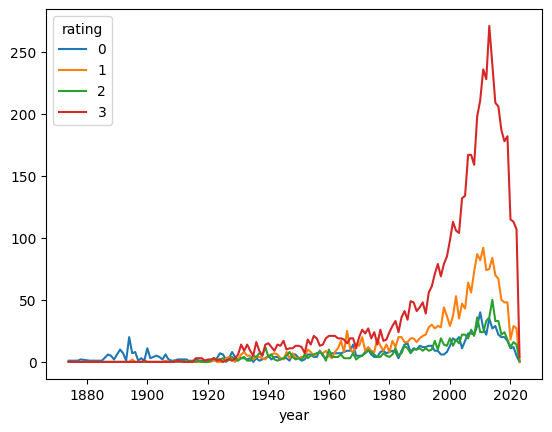

In [15]:
df.plot.line()

### Part 2.1: Create a Percentage Graph

In the graph above, you can see that the **total number of movies** in the dataset has increased dramatically from the 1880s until today.  However, it is hard to determine if the percentage of movies with a higher rating has increased.

To create a graph of the proportion of movies at reach ranking, add at least four additional columns to your DataFrame `df`:

- `"%0"`, that contains the percentage of movies with a `0` ranking in a given year,
- `"%1"`, that contains the percentage of movies with a `1` ranking in a given year,
- `"%2"`, that contains the percentage of movies with a `2` ranking in a given year,
- `"%3"`, that contains the percentage of movies with a `3` ranking in a given year,
- You may find adding a `"Total"` column helpful.

In [17]:
df['Total'] = df[0] + df[1] + df[2] + df[3]
df["%0"] = df[0]/df['Total']
df["%1"] = df[1]/df['Total']
df["%2"] = df[2]/df['Total']
df["%3"] = df[3]/df['Total']
df

rating,0,1,2,3,Total,%0,%1,%2,%3
year,,,,,,,,,
1874,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
1877,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
1878,2,0,0,0,2,1.000000,0.000000,0.000000,0.000000
1881,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
1883,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2019,17,48,18,182,265,0.064151,0.181132,0.067925,0.686792
2020,11,18,12,115,156,0.070513,0.115385,0.076923,0.737179
2021,12,29,16,113,170,0.070588,0.170588,0.094118,0.664706


In [18]:
## == PUZZLE 2.1 TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert( "%0" in df.columns ), "Make sure you have a \"%0\" column."
assert( "%1" in df.columns ), "Make sure you have a \"%1\" column."
assert( "%2" in df.columns ), "Make sure you have a \"%2\" column."
assert( "%3" in df.columns ), "Make sure you have a \"%3\" column."

import math
assert( math.isclose(
        df.loc[2020]["%0"],
        len(df_bechdel[ (df_bechdel.year == 2020) & (df_bechdel.rating == 0) ]) / len(df_bechdel[ (df_bechdel.year == 2020) ])
      )), "Your calculation of %0 is incorrect."

assert( math.isclose(
        df.loc[2019]["%1"],
        len(df_bechdel[ (df_bechdel.year == 2019) & (df_bechdel.rating == 1) ]) / len(df_bechdel[ (df_bechdel.year == 2019) ])
      )), "Your calculation of %1 is incorrect."

assert( math.isclose(
        df.loc[2018]["%2"],
        len(df_bechdel[ (df_bechdel.year == 2018) & (df_bechdel.rating == 2) ]) / len(df_bechdel[ (df_bechdel.year == 2018) ])
      )), "Your calculation of %2 is incorrect."

assert( math.isclose(
        df.loc[2017]["%3"],
        len(df_bechdel[ (df_bechdel.year == 2017) & (df_bechdel.rating == 3) ]) / len(df_bechdel[ (df_bechdel.year == 2017) ])
      )), "Your calculation of %3 is incorrect."

print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


### Part 2.2: Finding the Percentage of Movies /Year with Each Rating:

To visualize only the percentage columns, create a new `df_pct` that contains only the `%0`, `%1`, `%2`, and `%3` columns:

In [21]:
df_pct = df[ [ '%0', '%1', '%2', '%3' ] ]
df_pct

rating,%0,%1,%2,%3
year,,,,
1874,1.000000,0.000000,0.000000,0.000000
1877,1.000000,0.000000,0.000000,0.000000
1878,1.000000,0.000000,0.000000,0.000000
1881,1.000000,0.000000,0.000000,0.000000
1883,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2019,0.064151,0.181132,0.067925,0.686792
2020,0.070513,0.115385,0.076923,0.737179
2021,0.070588,0.170588,0.094118,0.664706


In [22]:
## == PUZZLE 2.2 TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.
tada = "\N{PARTY POPPER}"

assert( "df_pct" in vars() ), "Make sure you have defined the DataFrame `df_pct`."
assert( "%0" in df_pct.columns ), "Make sure you have a \"%0\" column."
assert( "%1" in df_pct.columns ), "Make sure you have a \"%1\" column."
assert( "%2" in df_pct.columns ), "Make sure you have a \"%2\" column."
assert( "%3" in df_pct.columns ), "Make sure you have a \"%3\" column."
assert( len(df_pct.columns) == 4 ), "Make sure you only have the percentage columns in `df_pct`."

print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.3: Visualizing the Percentage of Movies /Year with Each Rating:

Since `df_pct` has rows that always add up to `1`, this data is **PERFECT** for a stacked area graph.  Using `df.plot.area()`, create a stacked area visualization to view the growth of the percentage of each movie's rating:

<Axes: xlabel='year'>

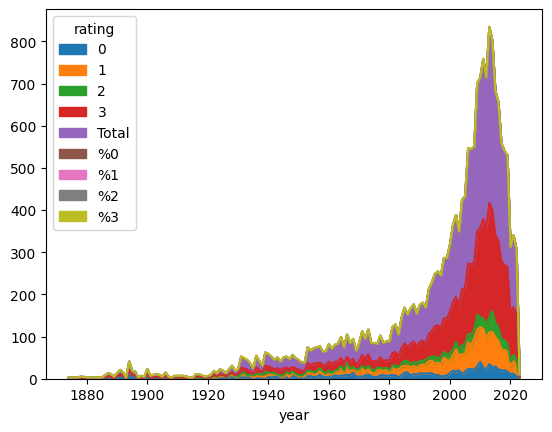

In [23]:
df.plot.area()

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the instructions to commit and grade this MicroProject!
